<a href="https://colab.research.google.com/github/youngsu1jeong/202007_bootcamp1/blob/master/g_11_%E1%84%89%E1%85%A5%E1%86%AB%E1%84%92%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AC%E1%84%80%E1%85%B1%EA%B0%9C%EB%85%90_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

## 선형회귀 함수 사용법

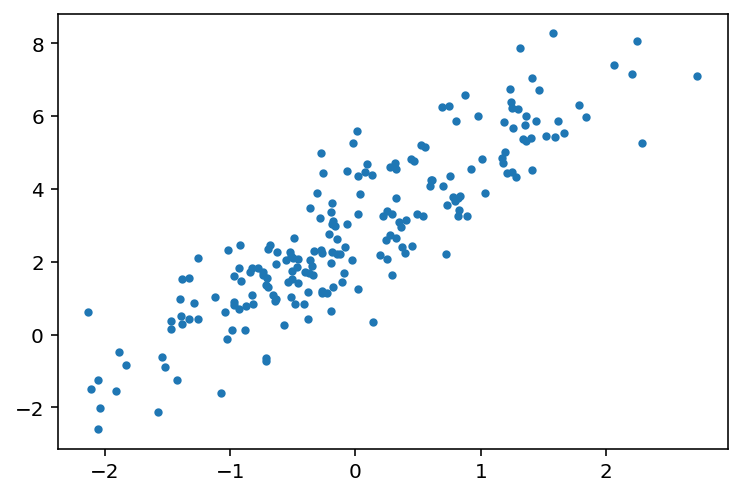

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #맥북에만 해당. 그림이쁘게 

n_samples = 200
x = np.random.randn(n_samples) # x 생성

# 계수 및 절편
w = 2
b = 3
# 노이지 추가
y = w*x + b  + np.random.randn(n_samples) #실제 y 값 생성
plt.scatter(x,y, s=10)

In [15]:
np.corrcoef(x,y)

array([[1.        , 0.88412464],
       [0.88412464, 1.        ]])

In [16]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression() # (1) 모델 생성
leg.fit(x.reshape(-1,1), y) # (2) 학습 

print(leg.coef_)
print(leg.intercept_)

[1.98194522]
2.8576283720969444


## 모델을 예측에 사용하기

In [17]:
leg.predict([[1],[5],[10]]) # (3) 모델 사용(회귀,분류) inference

array([ 4.83957359, 12.76735445, 22.67708053])

## 경사하강법 구현

변수가 1개인 경우
--

In [22]:
num_epoch = 10
lr = 0.01 # 뮤 상수

w = np.random.uniform()
b = np.random.uniform()
print(w,b)

for epoch in range(num_epoch): # 경사하강법 구현
    y_pred = w*x + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w:.6f}, b = {b:.6f} , error = {error:.6f}")

    w = w - lr*((y_pred - y)* x).mean() #경사하강법 wn = wn-1 -M(e*x).mean()
    b = b - lr*((y_pred - y)).mean() # bias 이기 때문 입력량(x) 와 상관없음 

0.5139148511252131 0.14646097116719192
 0 w1 = 0.513915, b = 0.146461 , error = 2.781461
 1 w1 = 0.527777, b = 0.173389 , error = 2.755299
 2 w1 = 0.541509, b = 0.200050 , error = 2.729395
 3 w1 = 0.555111, b = 0.226446 , error = 2.703748
 4 w1 = 0.568585, b = 0.252580 , error = 2.678355
 5 w1 = 0.581931, b = 0.278454 , error = 2.653325
 6 w1 = 0.595152, b = 0.304071 , error = 2.628758
 7 w1 = 0.608248, b = 0.329433 , error = 2.604434
 8 w1 = 0.621221, b = 0.354544 , error = 2.580351
 9 w1 = 0.634071, b = 0.379405 , error = 2.556505


변수가 2개인 경우
--

In [8]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[1.97849026 3.08743473]
4.034317609791507


In [9]:
leg.score(X,y) # R square

0.906868154195894

경사하강법
--

In [10]:
num_epoch = 10
lr = 0.7

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.626137,  w2 = 0.801398, b = 0.205456 , error = 3.834060
 1 w1 = 1.394066,  w2 = 1.821559, b = 2.791722 , error = 1.583999
 2 w1 = 1.718001,  w2 = 2.418902, b = 3.614487 , error = 0.988107
 3 w1 = 1.858787,  w2 = 2.743390, b = 3.884974 , error = 0.864547
 4 w1 = 1.922099,  w2 = 2.912982, b = 3.977908 , error = 0.830900
 5 w1 = 1.951439,  w2 = 2.999740, b = 4.011640 , error = 0.821850
 6 w1 = 1.965352,  w2 = 3.043579, b = 4.024660 , error = 0.818660
 7 w1 = 1.972058,  w2 = 3.065570, b = 4.030005 , error = 0.817461
 8 w1 = 1.975325,  w2 = 3.076554, b = 4.032322 , error = 0.817064
 9 w1 = 1.976927,  w2 = 3.082027, b = 4.033371 , error = 0.816992
